# 0729

## 경사하강법

손실함수를 최소화

그레디언트 : 기울기 

가중치 업데이트 하기 위한 조건: 미분이 가능한 상태

딥러닝에서 가중치를 업데이트하기 위해서도 사용

회귀쪽은 기본적인 원리



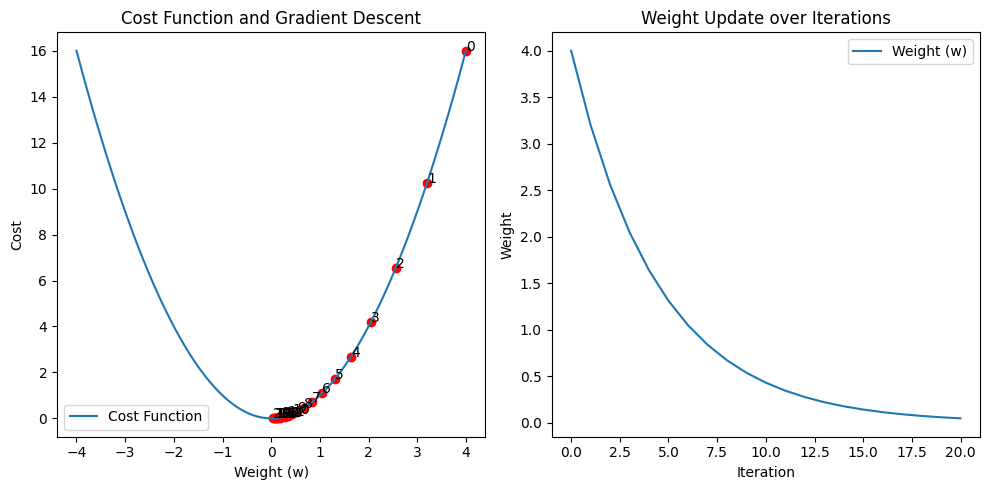

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 비용 함수와 그 기울기 정의
def cost_function(w):
    return w ** 2

def gradient(w):
    return 2 * w

# 초기 가중치 설정
w = 4
learning_rate = 0.1
iterations = 20

# 가중치 업데이트 기록을 저장할 리스트
weights = [w]
costs = [cost_function(w)]

# 경사하강법 수행
for _ in range(iterations):
    grad = gradient(w)
    w = w - learning_rate * grad
    weights.append(w)
    costs.append(cost_function(w))

# 시각화
plt.figure(figsize=(10, 5))

# 비용 함수 시각화
plt.subplot(1, 2, 1)
w_values = np.linspace(-4, 4, 100)
cost_values = cost_function(w_values)
plt.plot(w_values, cost_values, label='Cost Function')
plt.scatter(weights, costs, color='red')
for i in range(len(weights)):
    plt.annotate(f'{i}', (weights[i], costs[i]))
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.title('Cost Function and Gradient Descent')
plt.legend()

# 가중치 업데이트 시각화
plt.subplot(1, 2, 2)
plt.plot(weights, label='Weight (w)')
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weight Update over Iterations')
plt.legend()

plt.tight_layout()
plt.show()


비용 함수와 경사하강법
- 좌측 그래프는 비용 함수 f(w)=$w^2$ 의 그래프입니다.
- 빨간 점들은 각 반복(iteration)에서 가중치 w와 그에 따른 비용 함수 값을 나타냅니다.
점들은 초기 가중치 $w_{0}$ = 4에서 시작하여, 반복적으로 기울기를 따라 비용 함수의 최소값 w=0으로 수렴합니다.

가중치 업데이트 과정:(반복을 할때 적정 수준까지만 해야함)
- 우측 그래프는 반복에 따른 가중치 w의 변화를 나타냅니다.
- 초기 가중치에서 시작하여, 각 반복마다 가중치가 점점 줄어들어 최적의 값에 수렴하는 것을 보여줍니다.

요약
- 기울기(Gradient): 특정 지점에서 비용 함수가 증가하는 방향과 크기를 나타내는 벡터입니다.
- 경사하강법(Gradient Descent): 기울기를 따라 가중치를 업데이트하여 비용 함수의 최솟값을 찾는 최적화 알고리즘입니다.
- 가중치 업데이트: 가중치는 기울기의 반대 방향으로 업데이트됩니다. 이는 비용 함수 값을 줄이기 위함입니다.
- 시각화: 비용 함수와 가중치 업데이트 과정을 시각화하여 경사하강법이 어떻게 작동하는지 알기 쉽게 보여줍니다.

이 시각화를 통해 경사하강법이 어떻게 작동하는지, 즉 초기 가중치에서 시작하여 기울기를 따라 내려가면서 비용 함수를 최소화하는 방향으로 가중치를 업데이트하는 과정을 쉽게 이해할 수 있습니다.

In [14]:
import numpy as np
import pandas as pd
X = np.linspace(500, 1000, 100)  #x축 만들기 좋음
pd.Series(X).describe()

count     100.000000
mean      750.000000
std       146.522687
min       500.000000
25%       625.000000
50%       750.000000
75%       875.000000
max      1000.000000
dtype: float64

In [15]:
data = {"Size": np.linspace(500, 1000, 100)}  # 딕셔너리 형태로 데이터를 만들어줌
df = pd.DataFrame(data)
df.head()

,Size
0,500.000000
1,505.050505
2,510.101010
3,515.151515
4,520.202020


In [ ]:
noise = np.random.normal(0, 10, 1000000000)
pd.Series(noise).describe()

          Size
11  555.555556
47  737.373737
85  929.292929
28  641.414141
93  969.696970
..         ...
60  803.030303
71  858.585859
14  570.707071
92  964.646465
51  757.575758

[70 rows x 1 columns]
11    106.453814
47    158.045970
85    180.841015
28    122.276441
93    190.662772
         ...    
60    155.814318
71    187.097537
14     96.892236
92    185.908762
51    147.664329
Name: Price, Length: 70, dtype: float64
Coefficients: [0.20259144]
Mean Squared Error: 55.48631384865904
R^2 Score: 0.9393867391106524


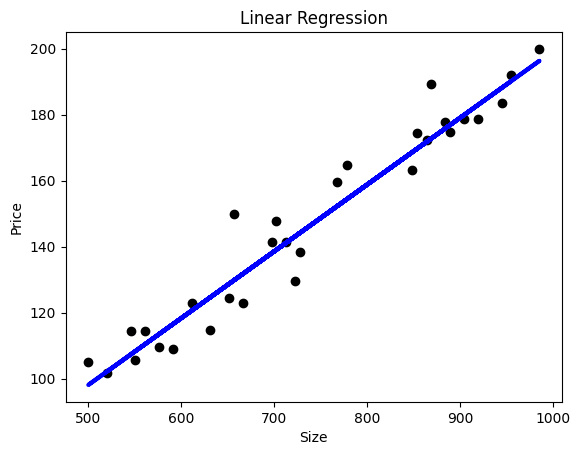

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

#  Example dataset
data = {'Size': np.linspace(500, 1000, 100)} #딕셔너리 형태로 데이터를 만들어줌
df = pd.DataFrame(data) #데이터 프레임으로 만들어줌 키가 컬럼이름이 됨, 밸류가 컬럼의 값이 됨, 리스트일 경우 컬럼값 따로 줘야함


np.random.seed(42)
noise = np.random.normal(0, 10, len(df['Size']))  #평균이 0이고 표준편차가 10인 정규분포를 따르는 난수 생성

df['Price'] = df['Size'] * 0.2 + noise

# X는 데이터의 특성을 나타내는 이차원 배열이고 여러 특성을 포함할 수 있는 구조를 갖는 반면
# y는 예측하고자 하는 타겟 변수를 나타내는 일차원 배열로 가 데이터 포인트에 대한 단일 출력값을 갖는다.
# 이러한 구조는 대부분의 머신러닝 라이브러리에서 표준적으로 사용되며 데이터의 구조를 명확하겍 하곡
# 모델링 과정을  간소화하는 데 도움이 된다.
X = df[['Size']]  #Predictor variable
y = df['Price']  #Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
print(X_train)
print(y_train)
y_pred = lr.predict(X_test)

print('Coefficients:', lr.coef_)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R^2 Score:', r2_score(y_test, y_pred))  #모델의 설명력 94점

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.show()

## 회귀 모델 평가

평균 제곱 오차(MSE):
- MSE는 오차의 제곱의 평균, 즉 추정값과 실제값의 차이의 평균제곱을 측정.MSE가 낮을수록 더 나은 적합성을 나타내지만 이상값에 민감할 수 있다.

RMSE(제곱 평균 오차): 오류가 크면 제곱을 해줘서 더 크게 반영되는 것으로 제곱근해줌, 
- RMSE는 MSE의 제곱근으로 반응변수와 단위가 동일. 큰 오류에 상대적으로 높은 가중치를 부여하므로 큰 오류가 특히 바람직하지 않은 경우 유용.

평균 절대 오차(MAE):
- MAE는 방향을 고려하지 않고 추정값과 실제값 사이의 평균 거리, 즉 절대 오차의 평균을 측정. MSE 및 RMSE에 비해 이상값에 덜 민감.

RMSE vs MAE:
- MAE는 모든 오차를 절대값으로 취급하고, 이를 단순히 평균낸 것. 이 방식은 모든 오차를 동일하게 처리하며, 크기에 관계없이 같은 가중치를 부여.
- RMSE는 먼저 각 오차를 제곱하고, 이들의 평균을 구한 후 마지막으로 제곱근을 취한다. 이 방식은 큰 오차에 더 큰 가중치를 부여함. 따라서, RMSE는 이상값이나 큰 오차에 더 민감하게 반응

R 제곱(결정 계수):
- R-제곱은 독립 변수에서 예측 가능한 종속 변수의 `분산 비율`을 측정. 범위는 0부터 1까지이며 값이 0이면 모형이 평균 주위의 반응 데이터 변동성을 전혀 설명하지 않는다는 것을 나타내고, 1은 모형이 모든 변동성을 설명한다는 것을 나타낸다.
  - 값의 범위: R-제곱은 0과 1 사이의 값을 가진다. 값이 0에 가까우면 모델이 데이터의 변동을 거의 설명하지 못하는 것이고, 1에 가까우면 데이터의 변동을 거의 완벽하게 설명한다는 의미.
  - 해석: R-제곱 값이 높다는 것은 모델이 데이터에 잘 맞는다는 것을 의미. 예를 들어, R-제곱이 0.9이면, 모델이 종속 변수의 변동의 90%를 설명한다고 해석할 수 있다.
  - 한계: R-제곱만으로 모델의 적합성을 완전히 판단하기는 어렵다. 분산의 특성에 의해 모델에 불필요한 변수가 추가될 때마다 R-제곱 값은 감소하지 않고, 오히려 증가할 수 있기 때문. 이는 과적합(overfitting)의 가능성을 무시할 수 있음을 의미.- 불필요한 변수가 학습되는게 과대적합
  - R 제곱 = 1 - (잔차(설명하지 못하는 부분)의 제곱합/총제곱합) 여기서 총제곱합은 종속변수 값과 그 평균 간의 차이의 제곱합
  - 잔차의 제곱합/총제곱합 비율은 모델이 설명하지 못하는 데이터의 변동성의 비율을 나타낸다. 모델이 완벽하게 데이터를 예측한다면, SS_residual은 0이 되고, R-제곱은 1이 된다. 반대로, 이 비율이 높으면 높을수록 모델이 데이터를 잘 설명하지 못하는 것을 의미하며, R-제곱 값은 낮아진다.

수정된 R-제곱:
- 모델의 예측 변수 수에 대한 R 제곱을 조정합니다. 다양한 수의 독립 변수가 있는 모델을 비교하는 데 유용.
  - 수정된 R-제곱은 모델에 포함된 독립 변수의 수를 고려하여 R-제곱을 조정.
  - 이 조정을 통해 변수의 수가 모델의 성능 평가에 미치는 영향을 감소시킨다.
  - 수정된 R-제곱은 독립 변수의 수가 증가할 때 그 변수들이 모델의 설명력을 실질적으로 향상시키지 않는다면 감소할 수도 있다.
  - 따라서, 수정된 R-제곱은 변수의 수가 많은 모델을 평가할 때 더 신뢰할 수 있는 척도가 된다.
  -  변수의 수가 모델의 성능 평가에 미치는 영향을 조정하며, 모델의 과적합을 방지하는 데 도움을 준다.

교차 검증:
- 데이터를 하위 집합으로 나누고, 일부 하위 집합(훈련 세트)에서 모델을 훈련하고, 나머지 하위 집합(검증 세트)에서 모델을 평가하는 작업이 포함. 일반적인 방법에는 k-겹 교차 검증이 포함됩니다. 여기서는 데이터를 k개의 하위 집합으로 나누고 모델을 k번 훈련하며, 매번 다른 하위 집합을 검증 세트로 사용. 보이지 않는 데이터에 대한 모델 성능에 대한 보다 강력한 추정치를 제공.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 수정 결정계수 : 독립 변수의 수와 표본 크기에 따라 조정한 값
n = X_test.shape[0]  #데이터 포인트의 수
p = X_test.shape[1]  #독립 변수의 수

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
#Cross Validation
#MSE와 같은 손실 함수의 경우 값을 최소화하는 것이 좋다 (MSE가 작을수록 좋다)
#이를 점수가 높을 수록 더 좋은 scikit-learn의 프레임워크에 맞추기 위해 MSE에 -1을 곱하여 음수 값으로 변환
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores).mean()

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')
print(f'Adjusted R^2 Score: {adjusted_r2:.4f}')
print(f'Cross Validation RMSE: {cv_rmse:.4f}')

Mean Squared Error: 0.5306
Mean Absolute Error: 0.5272
R^2 Score: 0.5958
Adjusted R^2 Score: 0.5952
Cross Validation RMSE: 0.7459


## 시각적 탐색, 다중공선성, 표준화, 로그변환, 이상치 탐지, 교차검증

다중공선성 : 과대적합 가능성 파악

다중공선성은 독립 변수들 간의 높은 상관관계로 인해 발생하며, 주로 회귀 분석에서 문제를 일으킵니다. 이는 모델의 해석 가능성에 영향을 주지만 예측 성능 자체에는 큰 영향을 미치지 않을 수 있습니다. - 다중공선성은 비슷한 독립변수가 있을 경우 발생, 통계적 방법에서 발생, 과대적합에 영향을 줌, 체크하는 방법: 상관관계로 찾음 

상관행렬 분석을 통하여 상관관계가 높은 변수를 제거하거나 결합하여 해결할 수 있다.

통계에서는 분산팽창지수로 다중공선성을 확인
- VIF값이 10을 초과하는 경우 해당 특성 간에 다중공선싱이 의심될 수 있다.

영향: 
- `회귀 계수의 추정이 불안정`해지며, 계수의 표준오차가 증가하여 회귀모델의 해석이 어려워질 수 있음
- `모델의 예측 성능은 유지`될 수 있지만, `개별 변수의 중요도를 해석하는데 문제가 발생`합니다.
- `회귀모델의 계수`가 큰 변동을 일으킬 수있습니다.

해결방법:
- 상관관계가 높은 변수를 제거하거나 결합
- 주성분 분석(PCA) 등 차원축소 기법 적용
- 릿지 회귀(Ridge Regression) 등의 정규화 기법 사용

데이터셋은 여러 개의 특성(피처)과 타겟 변수로 구성됩니다. 각 행은 하나의 지리적 블록 그룹(일종의 작은 행정 구역)에 해당하며, 각 특성은 해당 블록 그룹의 통계적 정보입니다.

특성(피처)
- MedInc: 블록 그룹의 중간 소득 (단위: $10,000)
- HouseAge: 블록 그룹 내 주택의 중간 연령
- AveRooms: 가구당 평균 방 수
- AveBedrms: 가구당 평균 침실 수
- Population: 블록 그룹 내 인구 수
- AveOccup: 가구당 평균 인원 수
- Latitude: 블록 그룹의 위도
- Longitude: 블록 그룹의 경도

타겟 변수
- MedHouseVal: 블록 그룹의 중간 주택 가격 (단위: $100,000)

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X = housing.data
y = housing.target

df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
df['Target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Target, dtype: float64

In [26]:
df['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd377bb3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd377bb940>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd377bb130>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd377bbe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd377d4160>],
 'means': []}

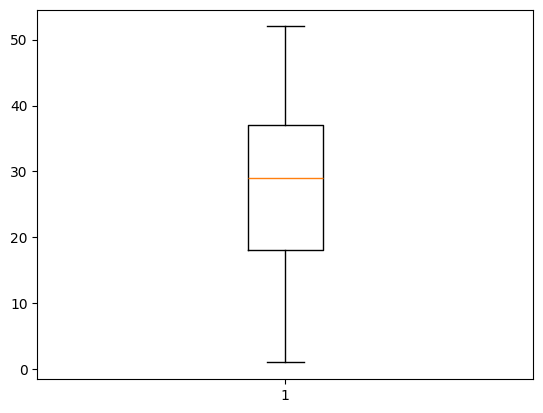

In [30]:
plt.boxplot(df['HouseAge'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
df['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd37528820>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd3752a0b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd375299f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd3752a5f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd3772bdf0>],
 'means': []}

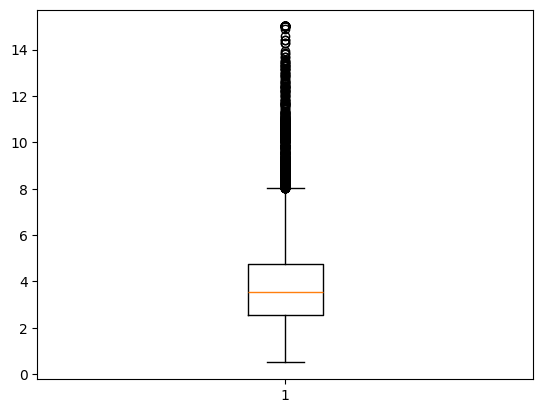

In [29]:
plt.boxplot(df['MedInc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd398a2110>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd398a2650>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd398a1e40>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd398a2b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd398a2e30>],
 'means': []}

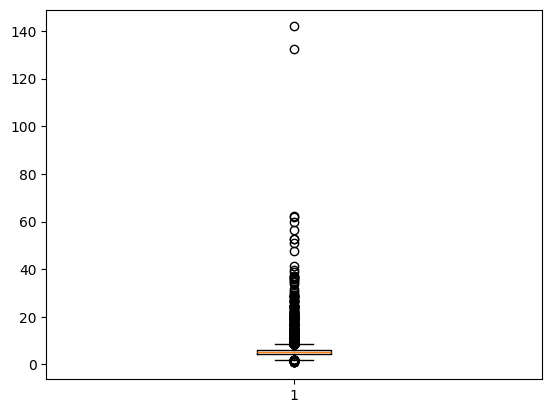

In [31]:
plt.boxplot(df['AveRooms'])

In [32]:
df['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [33]:
df['AveBedrms'].describe()

count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd39916560>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd39916aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd399162c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd39916fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd39917280>],
 'means': []}

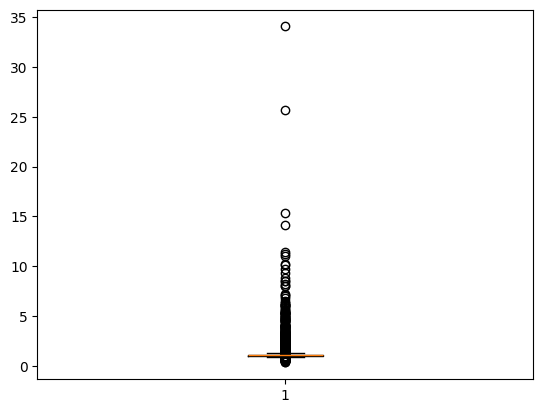

In [34]:
plt.boxplot(df['AveBedrms'])

In [35]:
df["AveOccup"].describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd3995e4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd3995d870>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd3995ef80>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd3995d3f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd39940310>],
 'means': []}

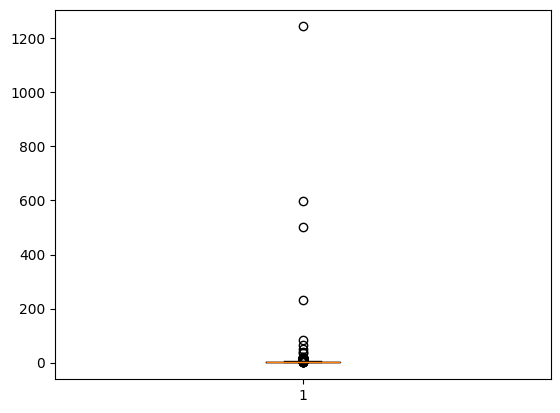

In [36]:
plt.boxplot(df['AveOccup'])

In [38]:
df[df['AveOccup'] > 10].info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 91 to 20352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      37 non-null     float64
 1   HouseAge    37 non-null     float64
 2   AveRooms    37 non-null     float64
 3   AveBedrms   37 non-null     float64
 4   Population  37 non-null     float64
 5   AveOccup    37 non-null     float64
 6   Latitude    37 non-null     float64
 7   Longitude   37 non-null     float64
 8   Target      37 non-null     float64
dtypes: float64(9)
memory usage: 2.9 KB


In [39]:
df[df["AveOccup"] > 10].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.938989,29.972973,5.688776,1.171687,2615.648649,87.786668,36.105135,-119.856757,1.816920
std,3.132148,15.146482,3.872472,0.499331,2306.519868,232.632680,2.156088,2.050462,1.304639
min,0.499900,5.000000,2.111111,0.625000,13.000000,10.153846,32.560000,-122.500000,0.425000
25%,1.912500,17.000000,3.166667,0.937500,822.000000,12.296089,34.070000,-121.290000,1.154000
50%,3.419100,29.000000,5.123810,1.074713,1722.000000,15.602941,36.510000,-120.650000,1.425000
75%,4.302900,41.000000,6.468000,1.142857,4198.000000,21.333333,37.790000,-118.170000,2.125000
max,15.000100,52.000000,24.500000,3.500000,8733.000000,1243.333333,40.410000,-115.220000,5.000010


In [40]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

In [42]:
cdf = df[
    [
        "MedInc",
        "HouseAge",
        "AveRooms",
        "AveBedrms",
        "Population",
        "AveOccup",
        "Latitude",
        "Longitude",
    ]
]

corr = cdf.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

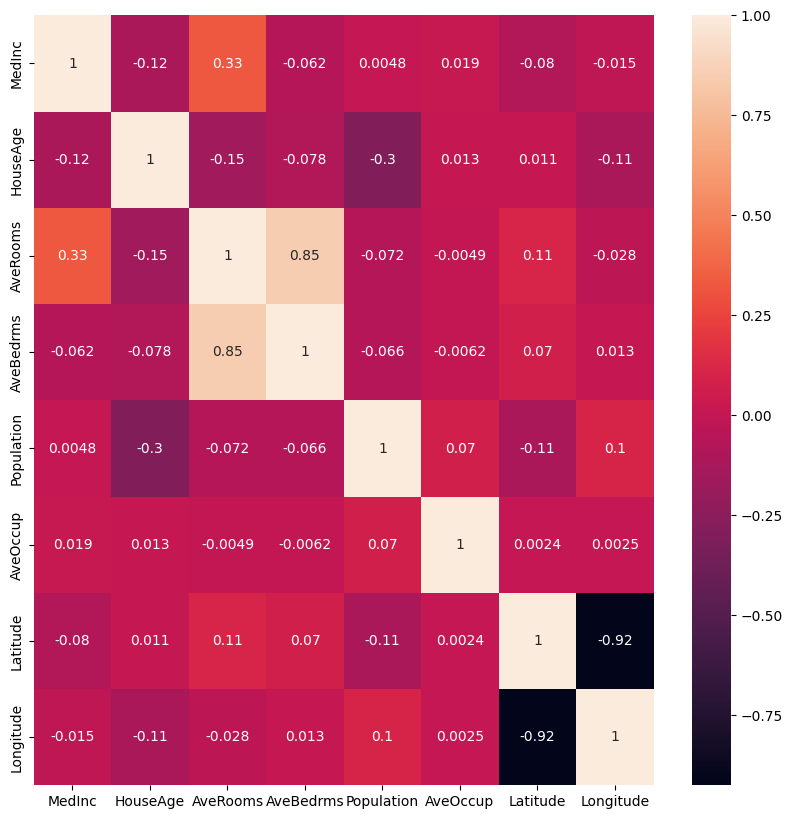

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

평균 방수와 평균 침실수의 강한 양의 상관관계가 있고 , 위도와 경도도 강한 음의 상관관계에 있다.

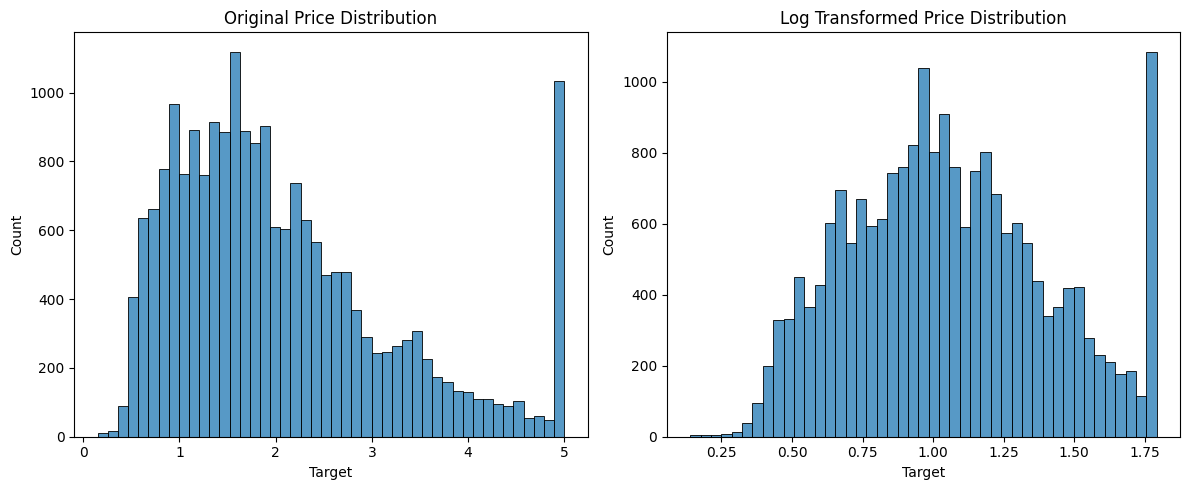

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

sns.histplot(df['Target'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

y_log = np.log1p(df['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

plt.tight_layout()
plt.show()

cross_val_score는 모델을 자동으로 학습시키고 평가하여, 각 교차 검증 단계에서의 성능을 알려준다. 하지만 이 함수는 최종적으로 학습된 모델을 반환하지 않기 때문에, 전체 훈련 데이터셋에 대해 별도로 모델을 학습시켜야 한다.

먼저 데이터를 훈련 세트와 테스트 세트로 분할한 후, 교차 검증을 통해 모델 성능을 평가합니다. 이후 전체 훈련 세트에 대해 모델을 학습시키고, 테스트 세트를 사용하여 최종 성능을 평가합니다.

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y.shape)
model = LogisticRegression(max_iter=200)
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross Validation Score: {scores}')
print(f'Mean Score: {scores.mean():.4f}')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test set Accuracy: {accuracy:.4f}')

(150,)
Cross Validation Score: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Score: 0.9733
Test set Accuracy: 0.9778


## 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수(가중치- 과대적합 막기 위해 제어)가 기하급수적으로 커지는 것을 제어할 필요가 있음
- 선형 모형의 비용함수는 RSS(실제 값과 예측값의 차이(오차))를 최소화하는 것만 고려한 결과 테스트 데이터 세트 예측 성능 저하 초래(선형함수는 비용 함수 최소화만 따짐- 그래서 회귀계수가 커지게 만들수 있음)
- RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루게 해야 함
- (최적모델을 위한 Cost 함수 구성요소 = 학습데이터 잔차 오류 최소화 + 회귀계수 크기 제어)
- 회귀 계수 값의 크기를 조절하기 위하여 비용 함수에 알파 값으로 패널티를 부여해 과적합을 개선하는 방식을 규제라고 함
- alpha값을 크게 하면 비용 함수는 회귀 계수 W의 값을 작게 해 과적합을 개선할 수 있으며 alpha값을 작게 하면 회귀 계수 W의 값이 커져도 어느정도 상쇄가 가능하므로 학습데이터 적합을 더 개선
- 비용함수에 alpha값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제라고 한다.
- 규제는 크게 L2 방식과 L1 방식으로 구분되며 전자를 적용한 회귀를 릿지, 후자를 적용한 것이 라쏘임
- L2는 W의 제곱에 패널티를 부여하며 L1은 W의 절댓값에 패널티 부여
- 엘리스틱넷 회귀는 L2 규제와 L1 규제를 결합한 회귀

알파벳 순으로 외우기(L, R)

정규화

L1 규제 (Lasso 회귀) 

- L1 규제는 Lasso(L1) 회귀에서 사용. 이 규제 방식은 모델의 손실 함수에 가중치의 `절대값`(|w|)의 합을 추가(규제). 수학적으로 L1 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑∣w∣) $

  α는 규제 강도를 조절하는 매개변수입니다.
- L1 규제의 주요 특징은 모델의 일부 가중치를 정확히 0으로 만들 수 있다는 것. 이는 불필요한 특성의 가중치를 제거하여 모델을 단순화하고, 결과적으로 특성 선택(feature selection)의 효과를 가지게 된다. - 변수 선택

L2 규제 (Ridge 회귀)
- L2 규제는 Ridge(L2) 회귀에서 사용. 이 규제는 모델의 손실 함수에 가중치의 `제곱`의 합을 추가. 수학적으로 L2 규제는 다음과 같이 표현:

  $ 비용 함수 목표 = Min(손실 함수 + α∑w^2) $

  α 역시 규제 강도를 조절하는 매개변수이다.
- L2 규제의 주요 특징은 가중치의 크기를 제한하여 모델의 복잡도를 감소시키는 것. L2 규제는 가중치를 완전히 0으로 만들지는 않지만, 가중치 값을 줄여 과적합을 방지하는 데 도움을 준다. - 변수 영향도 규제

요약

- Lasso 회귀(L1 규제): 불필요한 특성의 가중치를 0으로 만들어 특성 선택의 효과를 가짐.
- Ridge 회귀(L2 규제): 모든 가중치를 비슷한 수준으로 작게 유지하여 과적합 방지. - 계수를 작게
- 규제 강도: α는 모델의 복잡도와 규제 사이의 균형을 조절하는 중요한 하이퍼 파라미터(인위적으로 조절하는 것, 초매개변수), 로, 적절한 값을 찾기 위해 교차 검증 등의 방법을 사용할 수 있다.
- 파라미터는 주어지는 것

- CRIM: 도시별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거 지역의 비율
- INDUS: 비소매상업지역 토지 비율
- CHAS: 찰스강에 대한 더미 변수 (강의 경계에 위치하면 1, 아니면 0)
- NOX: 산화질소 농도 (천만 분의 일)
- RM: 주택 1가구당 평균 방의 개수
- AGE: 1940년 이전에 건축된 소유주택의 비율
- DIS: 보스턴의 5개 고용 센터까지의 가중 거리
- RAD: 방사형 도로까지의 접근성 지수
- TAX: 10,000달러 당 재산세율
- PTRATIO: 도시별 학생-교사 비율
- B: 1000(Bk - 0.63)^2 여기서 Bk는 도시별 흑인의 비율을 의미
- LSTAT: 인구 중 하위 계층의 비율(%)
- MEDV: 본인 소유의 주택 가격(중앙값) (단위: $1000)

In [50]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [54]:
boston.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [55]:
boston.DESCR

"**Author**:   \n**Source**: Unknown - Date unknown  \n**Please cite**:   \n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\nprices and the demand for clean air', J. Environ. Economics & Management,\nvol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.\nVariables in order:\nCRIM     per capita crime rate by town\nZN       proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS    proportion of non-retail business acres per town\nCHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX      nitric oxides concentration (parts per 10 million)\nRM       average number of rooms per dwelling\nAGE      proportion of owner-occupied units built prior to 1940\nDIS      weighted distances to five Boston employment centres\nRAD      index of accessibility to radial highways\nTAX      full-value prope

In [56]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [57]:
# 필요한 feature 이면 dtype 벼노한
for col in boston_df.columns:
    if boston_df[col].dtype.name == 'category':
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)

In [58]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [59]:
# 릿지 회귀
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X_data = boston_df.drop('PRICE', axis=1, inplace=False)
y_target = boston_df['PRICE']

ridge = Ridge(alpha=10)
#오차는 적을수록 좋기 때문에 neg_mean_squared_error를 사용
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
# 양수로 전환하기 위해 -1을 곱함
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print('5 folds의 평균 RMSE: {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-11.771 -28.005 -32.521 -78.612 -20.685]
5 folds의 개별 RMSE scores: [3.431 5.292 5.703 8.866 4.548]
5 folds의 평균 RMSE: 5.568


# 0730

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)


X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)

    # 교차 검증 점수 계산
    neg_mse_scores = cross_val_score(
        ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"알파값 {alpha} 일때 평가 점수:")
    print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
    print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
    print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

    # 전체 데이터셋으로 모델 학습 후 회귀계수 구하기
    ridge.fit(X_data, y_target)
    coefficients = ridge.coef_

    print("회귀계수:")
    for name, coef in zip(X_data.columns, coefficients):
        print(f"{name}: {coef:.4f}")
    print("\n")

알파값 0 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.669 -26.743 -35.541 -85.533 -21.566]
5 folds의 개별 RMSE scores: [3.559 5.171 5.962 9.248 4.644]
5 folds의 평균 RMSE: 5.717
회귀계수:
CRIM: -0.0651
ZN: 0.0420
INDUS: -0.0543
CHAS: 3.0838
NOX: -15.3094
RM: 4.1137
AGE: -0.0042
DIS: -1.5021
RAD: 0.0972
TAX: 0.0015
PTRATIO: -0.8228
B: 0.0084
LSTAT: -0.5159


알파값 0.1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.55  -26.568 -35.094 -85.388 -21.502]
5 folds의 개별 RMSE scores: [3.543 5.154 5.924 9.241 4.637]
5 folds의 평균 RMSE: 5.700
회귀계수:
CRIM: -0.0649
ZN: 0.0422
INDUS: -0.0577
CHAS: 3.0641
NOX: -14.3933
RM: 4.1182
AGE: -0.0050
DIS: -1.4882
RAD: 0.0968
TAX: 0.0014
PTRATIO: -0.8134
B: 0.0084
LSTAT: -0.5171


알파값 1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.024 -26.691 -33.148 -84.504 -21.339]
5 folds의 개별 RMSE scores: [3.467 5.166 5.757 9.193 4.619]
5 folds의 평균 RMSE: 5.641
회귀계수:
CRIM: -0.0640
ZN: 0.0432
INDUS: -0.0763
CHAS: 2.9263
NOX: -9.3524
RM: 4.1330
AGE: -0.0092
DIS: -1.4119
RAD: 0.0945
TAX: 

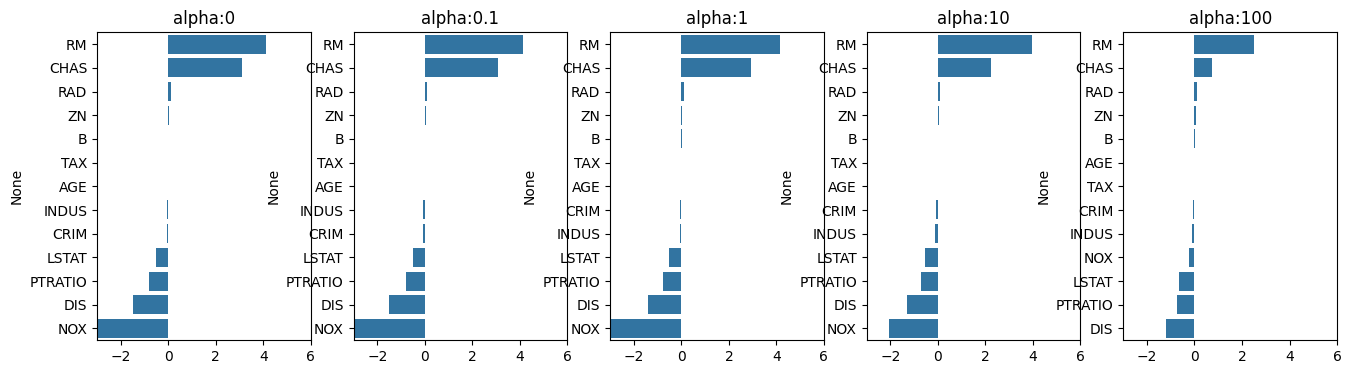

In [3]:
# alpha 값이 증가하면서 회귀 계수가 지속적으로 작아짐
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 4), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = "alpha:" + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

Q.라쏘회귀로 알파의 변화에 따른 RMSE와 회귀 계수의 변화를 출력하세요. (사용자 함수 적용)

In [6]:
import warnings
import pandas as pd

# FutureWarning 경고 메시지를 무시하도록 설정
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore")

알파값 0 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-12.669 -26.743 -35.541 -85.533 -21.566]
5 folds의 개별 RMSE scores: [3.559 5.171 5.962 9.248 4.644]
5 folds의 평균 RMSE: 5.717
알파값 0.1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-11.513 -27.788 -33.569 -83.199 -21.332]
5 folds의 개별 RMSE scores: [3.393 5.271 5.794 9.121 4.619]
5 folds의 평균 RMSE: 5.640
알파값 1 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-14.994 -35.505 -58.016 -59.302 -19.399]
5 folds의 개별 RMSE scores: [3.872 5.959 7.617 7.701 4.404]
5 folds의 평균 RMSE: 5.911
알파값 10 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [-27.786 -46.397 -80.323 -61.56  -16.302]
5 folds의 개별 RMSE scores: [5.271 6.812 8.962 7.846 4.038]
5 folds의 평균 RMSE: 6.586
알파값 100 일때 평가 점수:
5 folds의 개별 Negative MSE scores: [ -46.578  -83.808 -117.847  -87.981  -33.078]
5 folds의 개별 RMSE scores: [ 6.825  9.155 10.856  9.38   5.751]
5 folds의 평균 RMSE: 8.393


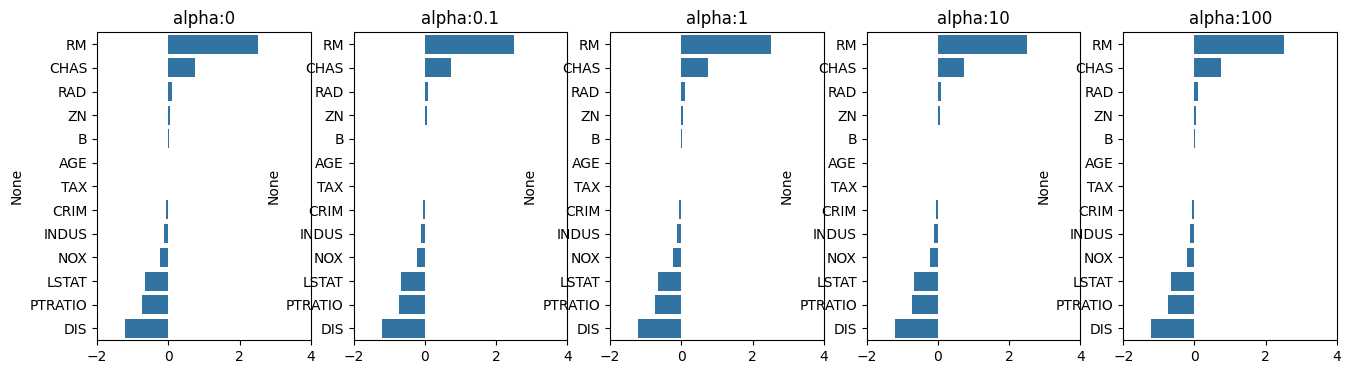

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)


X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]
alphas = [0, 0.1, 1, 10, 100]

fig, axs = plt.subplots(figsize=(16, 4), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)

    # 교차 검증 점수 계산
    neg_mse_scores = cross_val_score(
        lasso, X_data, y_target, scoring="neg_mean_squared_error", cv=5
    )
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"알파값 {alpha} 일때 평가 점수:")
    print("5 folds의 개별 Negative MSE scores:", np.round(neg_mse_scores, 3))
    print("5 folds의 개별 RMSE scores:", np.round(rmse_scores, 3))
    print("5 folds의 평균 RMSE: {0:.3f}".format(avg_rmse))

    # 전체 데이터셋으로 모델 학습 후 회귀계수 구하기
    lasso.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = "alpha:" + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-2, 4)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet


def get_linear_reg_eval(
    model_name, params=None, X_data_n=None, y_target_n=None, verbose=True
):
    coeff_df = pd.DataFrame()
    if verbose:
        print("####### ", model_name, "#######")
    for param in params:
        if model_name == "Ridge":
            model = Ridge(alpha=param)
        elif model_name == "Lasso":
            model = Lasso(alpha=param)
        else:
            model = ElasticNet(alpha=param, l1_ratio=0.7)  # l1_ratio=0.7: L1 규제의 비율을 나타냄, lasso가 70%, ㄱridge가 30%
        neg_mse_scores = cross_val_score(
            model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5
        )
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f"alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse}")
        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = "alpha:" + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [15]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval(
    "Lasso", params=lasso_alphas, X_data_n=X_data, y_target_n=y_target
)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.63975318642497
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.639696014167153
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.721165611229234
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.910564972979698
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.225662896892307


In [14]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.5903593663528115
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.580020171066973
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.5950260435420205
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.773112322207657
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.137958613436409


- 알파는 0 이상의 값으로 설정. 구체적인 범위는 특정한 제한이 있는 것은 아니며 적절한 값을 찾는 것은 모델의 성능과 데이터에 따라 다르다.
- 알파가 0일 경우 규제가 없는 것과 동일. 알파가 증가함에 따라 규제의 강도가 강해지고 모델의 가중치에 대한 제약이 커진다. 이는 과적합을 방지하지만 너무 큰 알파 값은 과소적합을 야기할 수 있다.

## 회귀 트리

- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 `평균값`을 구해 `회귀 예측값을 계산`
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

boston = fetch_openml(name="Boston", version=1, parser="auto")
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.drop(["CHAS", "RAD"], axis=1, inplace=True)
boston_df["PRICE"] = boston.target

for col in boston_df.columns:
    if boston_df[col].dtype.name == "category":
        # 카테고리형 데이터를 숫자로 변환 -> 범주형 데이터는 모델에 직접 사용할 수 없기 때문에 수치형으로 변환
        boston_df[col] = boston_df[col].cat.codes
        boston_df[col] = boston_df[col].astype(float)


X_data = boston_df.drop("PRICE", axis=1, inplace=False)
y_target = boston_df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=1000, random_state=0)
rf_reg = rf.fit(X_train, y_train)
pred_rf = rf_reg.predict(X_test)

mse = mean_squared_error(y_test, pred_rf)
rmse = sqrt(mse)
r2 = r2_score(y_test, pred_rf)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 9.3171
Root Mean Squared Error: 3.0524
R^2 Score: 0.8750


In [19]:
from sklearn.model_selection import cross_val_score

y_target = boston_df["PRICE"]
X_data = boston_df.drop("PRICE", axis=1, inplace=False)

rf = RandomForestRegressor(n_estimators=1000, random_state=0)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 3))
print(f'5 folds의 평균 RMSE: {avg_rmse:.3f}')


5 folds의 개별 Negative MSE scores: [ -7.977 -13.265 -20.579 -46.291 -18.92 ]
5 folds의 개별 RMSE scores: [2.824 3.642 4.536 6.804 4.35 ]
5 folds의 평균 RMSE: 4.431
